%pip install escher

In [15]:
conditions = {'EX_glc__D_e':(-10,0),'EX_o2_e':(-20,0)}
print(conditions.items())

# Convert the values into a flat list
flat_values = [item for pair in conditions.values() for item in pair]

# Count the elements in the flat list
num_items = len(conditions) + len(flat_values)

for i in range(1, num_items):
     print(f'sys.argv[{i}]')

dict_items([('EX_glc__D_e', (-10, 0)), ('EX_o2_e', (-20, 0))])
sys.argv[1]
sys.argv[2]
sys.argv[3]
sys.argv[4]
sys.argv[5]


In [22]:
conditions = ['EX_glc__D_e', -10, 0, 'EX_o2_e', -20, 0]
print(conditions[1:])

# Initialize an empty dictionary
conditions_dict = {}

# Iterate through the list in steps of 3
for i in range(0, len(conditions), 3):
    key = conditions[i]
    values = (conditions[i + 1], conditions[i + 2])
    conditions_dict[key] = values

print(conditions_dict)


[-10, 0, 'EX_o2_e', -20, 0]
{'EX_glc__D_e': (-10, 0), 'EX_o2_e': (-20, 0)}


In [6]:
import webbrowser

protein =  'Q12189'

# Open the web page in a new browser tab
webbrowser.open(f'https://www.uniprot.org/uniprotkb/{protein}/entry')

True

import markupsafe
print(markupsafe.__version__)

%pip install markupsafe==1.1.1 --user

# restart kernel

import markupsafe
print(markupsafe.__version__)

%pip install mewpy

In [1]:
import escher
from escher import Builder
import mewpy
import cobra

In [2]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [3]:
escher.list_available_models()

[{'organism': 'Saccharomyces cerevisiae', 'model_name': 'iMM904'},
 {'organism': 'Homo sapiens', 'model_name': 'RECON1'},
 {'organism': 'Escherichia coli', 'model_name': 'e_coli_core'},
 {'organism': 'Escherichia coli', 'model_name': 'iJO1366'}]

In [2]:
# builder = Builder(model_json = 'e_coli_core.Core metabolism.json')
# isto não vão chegar para criar o mapa porque apenas temos o json do modelo e falta o do mapa

# builder = Builder(model_json='e_coli_core.json', map_json='e_coli_core.Core metabolism.json')
# assim já funciona

# ou então assim
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

builder.highlight_missing = True
builder

Builder(highlight_missing=True)

In [2]:
builder = Builder(
    map_name='iMM904.Central carbon metabolism',
    model_name='iMM904',
)

# builder.highlight_missing = True
# builder

In [4]:
#laading a reaction model

import json

f = open('reactions_acetate.json')

reaction_model = json.load(f)

builder.reaction_data = reaction_model

In [5]:
builder

Builder(allow_building_duplicate_reactions=False, and_method_in_gene_reaction_rule='mean', cofactors=['atp', '…

In [6]:
# save the map as a html file
map_html = builder.save_html('e_coli_core.Core metabolism.html')

You can add reaction, gene or metabolite data to the model going to Data -> Load reaction data (for example) and load a json or csv file with the data.

In [2]:
#create the model to use in mewpy

# model = cobra.io.load_json_model(r'C:\Users\Utilizador\Desktop\escher_python\e_coli_core.json')
model = cobra.io.load_json_model(r'C:\Users\toma_\OneDrive\Área de Trabalho\escher_python\e_coli_core.json')

#this json file used is the model from the e_coli_core map that can be taken from the escher website

In [2]:
model = cobra.io.load_json_model(r'C:\Users\toma_\OneDrive\Área de Trabalho\escher_python\iMM904.json')

In [3]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,1.611,0,0.00%
o2_e,EX_o2_e,2,0,0.00%
pi_e,EX_pi_e,0.05691,0,0.00%
so4_e,EX_so4_e,0.02225,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-18.02,1,36.29%
etoh_e,EX_etoh_e,-15.82,2,63.70%
for_e,EX_for_e,-0.001488,1,0.00%
h2o_e,EX_h2o_e,-5.64,0,0.00%


In [4]:
model.metabolites.trp__L_e.summary()

Percent,Flux,Reaction,Definition
Percent,Flux,Reaction,Definition


In [3]:
# build a phenotype simulation
from mewpy.simulation import get_simulator
simul = get_simulator(model)

In [4]:
simul.objective

{'BIOMASS_SC5_notrace': 1.0}

In [6]:
simul.find_reactions('EX_trp__L_e')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_trp__L_e,L-Tryptophan exchange,0.0,999999.0,{'trp__L_e': -1.0},,{}


In [7]:
simul.objective = 'EX_trp__L_e'

In [8]:
simul.objective

{'EX_trp__L_e': 1.0}

In [9]:
simul.find_reactions('EX_trp__L_e')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_trp__L_e,L-Tryptophan exchange,0.0,999999.0,{'trp__L_e': -1.0},,{}


In [6]:
print(simul.metabolites[:10])

['10fthf_c', '13dpg_c', '1pyr5c_c', '25aics_c', '2amsa_c', '2aobut_c', '2cpr5p_c', '2dda7p_c', '2dhp_c', '2dr1p_c']


In [35]:
simul.find_genes()

,name,reactions
id,,
b0351,mhpF,[ACALD]
b1241,adhE,"[ACALD, ALCD2x]"
s0001,,"[ACALDt, CO2t, H2Ot, NH4t, O2t]"
b2296,ackA,[ACKr]
b3115,tdcD,[ACKr]
...,...,...
b0008,talB,[TALA]
b2464,talA,[TALA]
b2935,tktA,"[TKT1, TKT2]"


In [54]:
simul.find_genes()['name'][4]

'tdcD'

In [55]:
simul.find_genes()['name'].index[4]

'b3115'

In [57]:
for idx, gene in enumerate(simul.find_genes()['name']):
    if gene == 'tdcD':
        print(simul.find_genes()['name'].index[idx])

b3115


In [7]:
simul.reactions[:10]

['13BGH',
 '13BGHe',
 '13GS',
 '16GS',
 '23CAPPD',
 '2DDA7Ptm',
 '2DHPtm',
 '2DOXG6PP',
 '2HBO',
 '2HBt2']

In [5]:
# now let's simulate the growth rate
result = simul.simulate(method='pFBA')
result

objective: 338.00599158238896
Status: OPTIMAL
Method:pFBA

In [6]:
result.find('trp', show_nulls=True)

,Flux rate
Reaction ID,
EX_trp__L_e,0.0


In [11]:
result.fluxes['EX_trp__L_e']

2.090909090909086

In [6]:
simul.objective

{'BIOMASS_SC5_notrace': 1.0}

In [7]:
result.fluxes['BIOMASS_SC5_notrace']

0.2878657037040496

In [13]:
result.get_metabolite('trp__L_e')

,Value
Reaction,
EX_trp__L_e,-2.090909
TRPt2r,2.090909


In [9]:
simul.find_reactions('TRPS1')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
TRPS1,Tryptophan synthase (indoleglycerol phosphate),0.0,999999.0,"{'h2o_c': 1.0, 'g3p_c': 1.0, 'ser__L_c': -1.0,...",YGL026C,{}


In [10]:
simul.find_metabolites('trp__L_c')

,name,compartment,formula
id,,,
trp__L_c,L-Tryptophan,c,C11H12N2O2


In [11]:
import pandas as pd

df = pd.DataFrame(result.fluxes, index=['flux']).T

builder.reaction_data = df
builder

Builder(allow_building_duplicate_reactions=False, and_method_in_gene_reaction_rule='mean', cofactors=['atp', '…

In [7]:
import json

with open('reactions_iMM904.json', 'w') as f:
    json.dump(result.fluxes, f, indent=4)

In [12]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

simul.find_reactions()

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
13BGH,Endo 1 3 beta glucan glucohydrase,0.000000,999999.000000,"{'13BDglcn_c': -1.0, 'glc__D_c': 1.0, 'h2o_c':...",YGR282C,{}
13BGHe,Exo 1 3 beta glucan glucohydrase,0.000000,999999.000000,"{'h2o_e': -1.0, '13BDglcn_e': -1.0, 'glc__D_e'...",YOR190W or YDR261C or YLR300W,{}
13GS,1 3 beta glucan synthase,0.000000,999999.000000,"{'13BDglcn_c': 1.0, 'udp_c': 1.0, 'udpg_c': -1...",((YCR034W and YGR032W) and YLR343W) or ((YCR03...,{}
16GS,1 6 beta glucan synthase,0.000000,999999.000000,"{'16BDglcn_c': 1.0, 'udp_c': 1.0, 'udpg_c': -1...",YPR159W or YGR143W,{}
23CAPPD,ADP ribose 2 3 cyclic phosphodiesterase,0.000000,999999.000000,"{'h2o_c': -1.0, '23camp_c': -1.0, 'h_c': -1.0,...",YGR247W,{}
2DDA7Ptm,2 Dehydro 3 deoxy D arabino heptonate7 phohsph...,-999999.000000,999999.000000,"{'2dda7p_m': 1.0, '2dda7p_c': -1.0}",,{}
2DHPtm,2 Dehydropantoate mitochondrial transport,-999999.000000,999999.000000,"{'2dhp_m': 1.0, '2dhp_c': -1.0}",,{}
2DOXG6PP,2 deoxyglucose 6 phosphatase,0.000000,999999.000000,"{'2doxg6p_c': -1.0, 'h2o_c': -1.0, '2dglc_c': ...",YHR044C or YHR043C,{}
2HBO,2 HydroxybutyrateNAD oxidoreductase,-999999.000000,999999.000000,"{'2obut_c': 1.0, 'nadh_c': 1.0, 'h_c': 1.0, 'n...",,{}


In [6]:
simul.find_genes('YKL211C') #TPR3

,name,reactions
id,,
YKL211C,TRP3,"[ANS, IGPS]"


In [13]:
simul.find_reactions('ANS')['stoichiometry'][0]

{'anth_c': 1.0,
 'glu__L_c': 1.0,
 'chor_c': -1.0,
 'h_c': 1.0,
 'pyr_c': 1.0,
 'gln__L_c': -1.0}

In [7]:
simul.find_genes('YJR105W') #ADO1

,name,reactions
id,,
YJR105W,ADO1,[ADNK1]


In [8]:
simul.find_genes('YOL126C') #MDH2

,name,reactions
id,,
YOL126C,MDH2,[MDH]


In [9]:
simul.find_genes('YDR127W') #ARO1

,name,reactions
id,,
YDR127W,ARO1,"[DHQS, DHQTi, PSCVT, SHK3Dr, SHKK]"


In [10]:
simul.find_genes('YDR050C') #TPI1

,name,reactions
id,,
YDR050C,TPI1,[TPI]


In [11]:
# genes = ['YKL211C','YJR105W', 'YOL126C', 'YDR127W', 'YDR050C']
# genes = ['YOR095C', 'YDR380W', 'YCR032W', 'YJR057W', 'YPR074C', 'YIL010W']

genes = []

# values = [32, 0, 0, 4, 0.5]
# values = [16, 0, 0, 0, 4, 0]

constraints = {}

for gene in genes:
    for reaction in simul.find_genes(gene)['reactions'][0]:
        vi = result.fluxes[reaction]
        p = values[genes.index(gene)]
        result.fluxes[reaction] = result.fluxes[reaction]*p
        new_value = result.fluxes[reaction]
        print(gene, reaction, new_value)
        if p < 1 and vi > 0:
            constraints[reaction] = (0.0, new_value)
        elif p < 1 and vi < 0:
            constraints[reaction] = (new_value,0.0)
        elif p > 1 and vi > 0:
            constraints[reaction] = (new_value, 999999.0)
        elif p > 1 and vi < 0:
            constraints[reaction] = (-999999.0, new_value)
        else:
            constraints[reaction] = (0.0, 0.0)

print(constraints)

new_simul = get_simulator(model, constraints=constraints)

new_result = new_simul.simulate(method='pFBA')
new_result

YKL211C ANS 66.9090909090909
YKL211C IGPS 66.9090909090909
YJR105W ADNK1 0.0
YOL126C MDH 0.0
YDR127W DHQS 8.363636363636365
YDR127W DHQTi 8.363636363636365
YDR127W PSCVT 8.363636363636363
YDR127W SHK3Dr 8.363636363636365
YDR127W SHKK 8.363636363636365
YDR050C TPI 3.7954545454545396
{'ANS': (66.9090909090909, 999999.0), 'IGPS': (66.9090909090909, 999999.0), 'ADNK1': (0.0, 0.0), 'MDH': (0.0, 0.0), 'DHQS': (8.363636363636365, 999999.0), 'DHQTi': (8.363636363636365, 999999.0), 'PSCVT': (8.363636363636363, 999999.0), 'SHK3Dr': (8.363636363636365, 999999.0), 'SHKK': (8.363636363636365, 999999.0), 'TPI': (0.0, 3.7954545454545396)}


Infeasible: None (infeasible).

{'ANS': (0.26161235152697476, 999999.0), 
'IGPS': (0.26161235152701917, 999999.0), 
'ADNK1': (0.0, 0.0), 
'MDH': (0.0, 0.0), 
'DHQS': (0.30433162195677554, 999999.0), 
'DHQTi': (0.30433162195677554, 999999.0), 
'PSCVT': (0.30433162195677554, 999999.0), 
'SHK3Dr': (0.3043316219567755, 999999.0), 
'SHKK': (0.30433162195677554, 999999.0), 
'TPI': (0.0, 4.4588847233229565)}

In [11]:
new_result.fluxes['TRPS1']

0.26161235152697476

In [12]:
new_result.get_metabolite('trp__L_c')

,Value
Reaction,
TRPO2,-0.000000
TRPS1,0.261612
TRPTA,-0.257305
TRPTRS,-0.000000
TRPt2m,-0.000000
TRPt2r,0.000000
BIOMASS_SC5_notrace,-0.004308


In [13]:
new_simul.find_reactions('TRPTA')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
TRPTA,Tryptophan transaminase,-999999.0,999999.0,"{'akg_c': -1.0, 'glu__L_c': 1.0, 'indpyr_c': 1...",YGL202W or YHR137W,{}


<AxesSubplot:xlabel='BIOMASS_SC5_notrace', ylabel='TRPS1'>

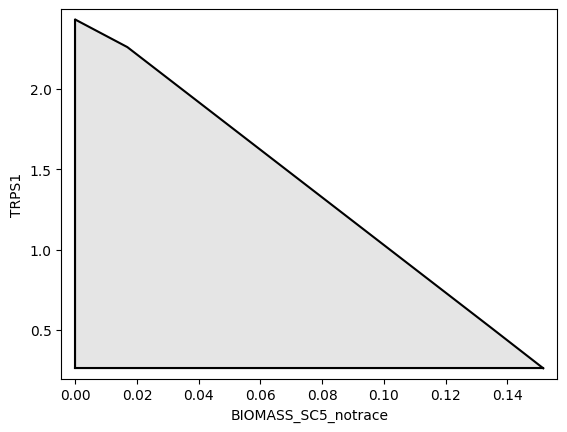

In [19]:
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'BIOMASS_SC5_notrace', 'EX_trp_L_e_', constraints=constraints)

In [13]:
import json

with open('mod_iMM904.json', 'w') as f:
    json.dump(new_result.fluxes, f, indent=4)

In [14]:
new_model = cobra.io.load_json_model(r'C:\Users\toma_\OneDrive\Área de Trabalho\escher_python\mod_iMM904.json')

ValueError: Object has no .reactions attribute. Cannot load.

In [23]:
from mewpy.optimization.evaluation import TargetFlux

fevaluatioon = TargetFlux('trp__L_c')
print(fevaluatioon)

TargetFlux trp__L_c with at least 0.0 of biomass (None)


In [6]:
a = ['bia', 'tomas', 'joao', 'maria', 'ana', 'moura', 'camila', 'carolina', 'joana', 'miguel']
b = [1,2,3,4,5,6,7,8,9,10]
c = ['a','b','c','d','e','f','g','h','i','j']

lista = {}

for i in range(len(a)):
    lista[a[i]] = (b[i], c[i])
print(lista)

{'bia': (1, 'a'), 'tomas': (2, 'b'), 'joao': (3, 'c'), 'maria': (4, 'd'), 'ana': (5, 'e'), 'moura': (6, 'f'), 'camila': (7, 'g'), 'carolina': (8, 'h'), 'joana': (9, 'i'), 'miguel': (10, 'j')}


In [7]:
new_simul = get_simulator(model, constraints=constraints)

new_result = new_simul.simulate(method='pFBA')
new_result

Infeasible: None (infeasible).

In [6]:
constraints = {'ANS': (0.2616123515269731, 999999.0),
                'IGPS': (0.26161235152697315, 999999.0),
                'ADNK1': (0.0, 0.0),
                'MDH': (0.0, 0.0),
                'DHQS': (0.30433162195677366, 999999.0),
                'DHQTi': (0.30433162195677366, 999999.0),
                'PSCVT': (0.30433162195677366, 999999.0),
                'SHK3Dr': (0.3043316219567737, 999999.0),
                'SHKK': (0.3043316219567737, 999999.0),
                'TPI': (-999999.0, 4.4588847236047355)}

# constraints = {'RPI': (-999999.0, -5.616918763405238), 
#                '3MOPDC': (0.0, 0.0), 
#                '4MOPDC': (0.0, 0.0), 
#                'INDPYRD': (0.0, 0.0), 
#                'PPYRDC': (0.0, 0.0), 
#                'ACt2r': (0.0, 0.0), 
#                'DTMPK': (0.0, 0.0), 
#                'TKT1': (1.053851070930946, 999999.0), 
#                'TKT2': (0.7495194489750621, 999999.0), 
#                'THIORDXni': (0.0, 0.0)}

new_simul = get_simulator(model, constraints=constraints)

new_result = new_simul.simulate(method='pFBA')
new_result

objective: 246.64187987328037
Status: OPTIMAL
Method:pFBA

<AxesSubplot:xlabel='BIOMASS_SC5_notrace', ylabel='ANS'>

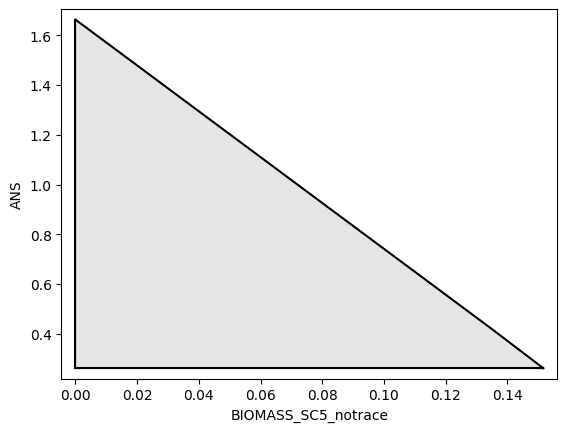

In [7]:
from mewpy.visualization.envelope import plot_flux_envelope

constraints = {'ANS': (0.2616123515269731, 999999.0),
                'IGPS': (0.26161235152697315, 999999.0),
                'ADNK1': (0.0, 0.0),
                'MDH': (0.0, 0.0),
                'DHQS': (0.30433162195677366, 999999.0),
                'DHQTi': (0.30433162195677366, 999999.0),
                'PSCVT': (0.30433162195677366, 999999.0),
                'SHK3Dr': (0.3043316219567737, 999999.0),
                'SHKK': (0.3043316219567737, 999999.0),
                'TPI': (-999999.0, 4.4588847236047355)}

plot_flux_envelope(new_simul,'BIOMASS_SC5_notrace', 'ANS', constraints=constraints)

In [9]:
# We also need to verify that the organism continues to grow:

for key, value in simul.objective.items():
    print(new_result.fluxes[key])

# result.fluxes['BIOMASS_SC5_notrace']

0.15167865255663832


In [14]:
import json

with open('reactions_tryptophan.json', 'w') as f:
    json.dump(new_result.fluxes, f, indent=4)

In [10]:
simul.find_reactions('EX_ac_e')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_ac_e,Acetate exchange,0.0,1000.0,{'ac_e': -1.0},,{'SBO': 'SBO:0000627'}


In [7]:
# modification for the production of acetate in escheria coli
# deletion of mdh and pflB

envcond = {'MDH': (0, 0),
           'PFL': (0, 0)}

simul_acetate = get_simulator(model,envcond=envcond)

In [8]:
result_acetate = simul_acetate.simulate(method='FBA')
result_acetate

objective: 0.8258192905969891
Status: OPTIMAL
Method:FBA

In [19]:
simul_acetate.find_reactions('EX_ac_e')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_ac_e,Acetate exchange,0.0,1000.0,{'ac_e': -1.0},,{'SBO': 'SBO:0000627'}


In [12]:
f = '2.2, 2.3'
f = f.split(', ')
y = [float(x) for x in f]
y

[2.2, 2.3]

In [13]:
# create a json file with the reactions to use in escer
import json

with open('reactions_acetate.json', 'w') as f:
    json.dump(result_acetate.fluxes, f, indent=4)

In [16]:
# let's now knock out the glucose uptake reaction
envcond={'EX_glc__D_e': (0.0, 0.0)}
simul_no_glc = get_simulator(model,envcond=envcond)

In [17]:
simul_no_glc.find_reactions('EX_glc__D_e')

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_glc__D_e,D-Glucose exchange,0.0,0.0,{'glc__D_e': -1.0},,{'SBO': 'SBO:0000627'}


In [18]:
# now let's simulate the growth rate
simul_no_glc.simulate(method='FBA')

/home/tomas/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


objective: -0.04531208903852501
Status: INFEASIBLE
Method:FBA

Como podemos verificar o modelo torna-se infeasible porque retiramos uma reação essencial para o crescimento do modelo.
No jogo podemos colocar esta informação quando o jogador clicar num botão para realizar uma análise de FBA.

In [ ]:
import pandas as pd

# FBA flux simulation data 
df = pd.read_json('/home/tomas/Downloads/S3_iJO1366_anaerobic_FBA_flux.json', typ='series')

#load the new model to the escer builder
builder.reaction_data = df

builder